In [1]:
import utils.plot_utils as plot_utils
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/pmzff/Documents/GitHub/cvd-net-pipeline/venv/lib/python3.12/site-packages/utils/plot_utils.py:417: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df[file_name] = df["ST"]


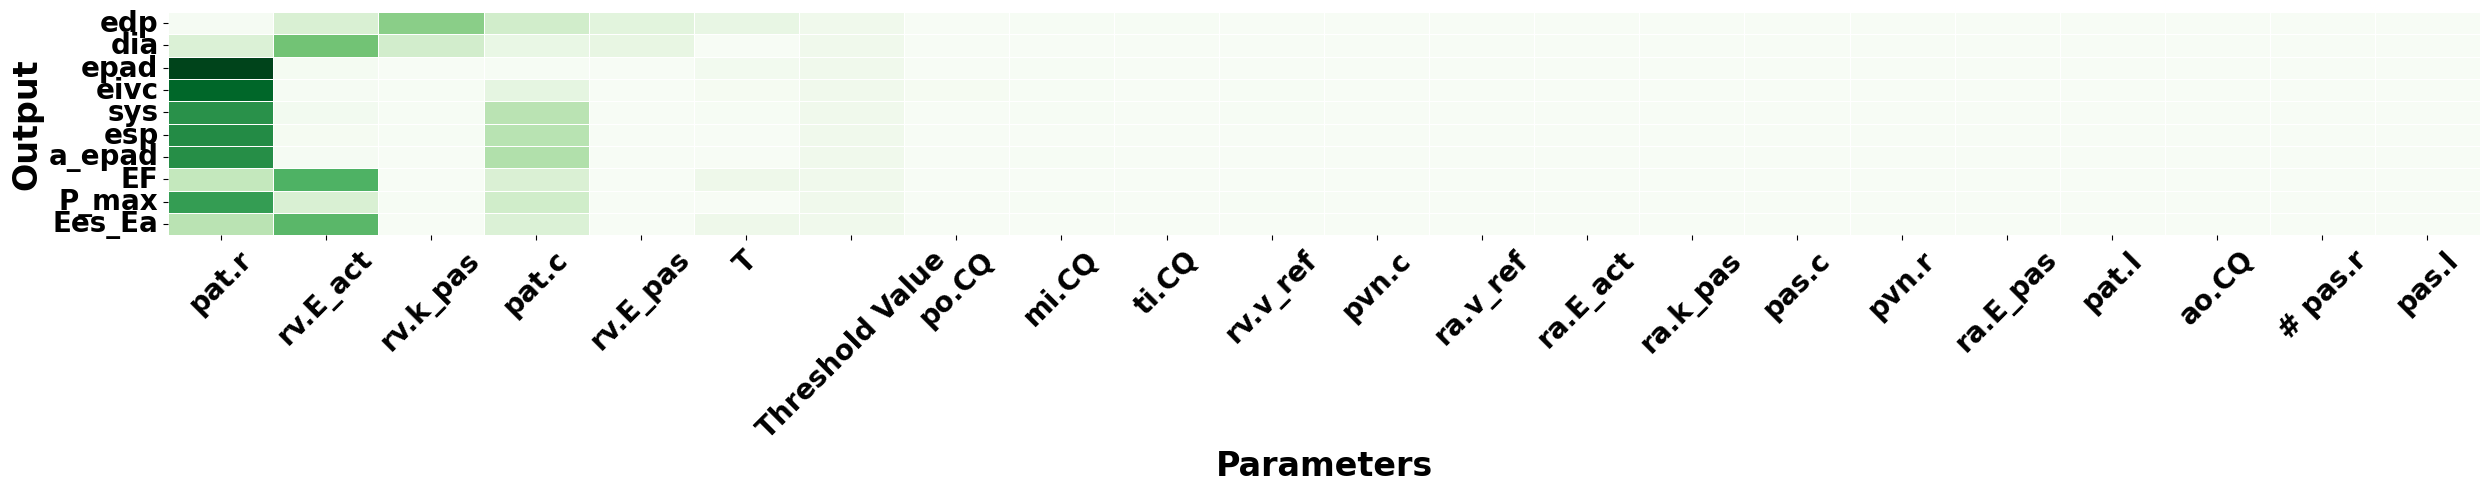

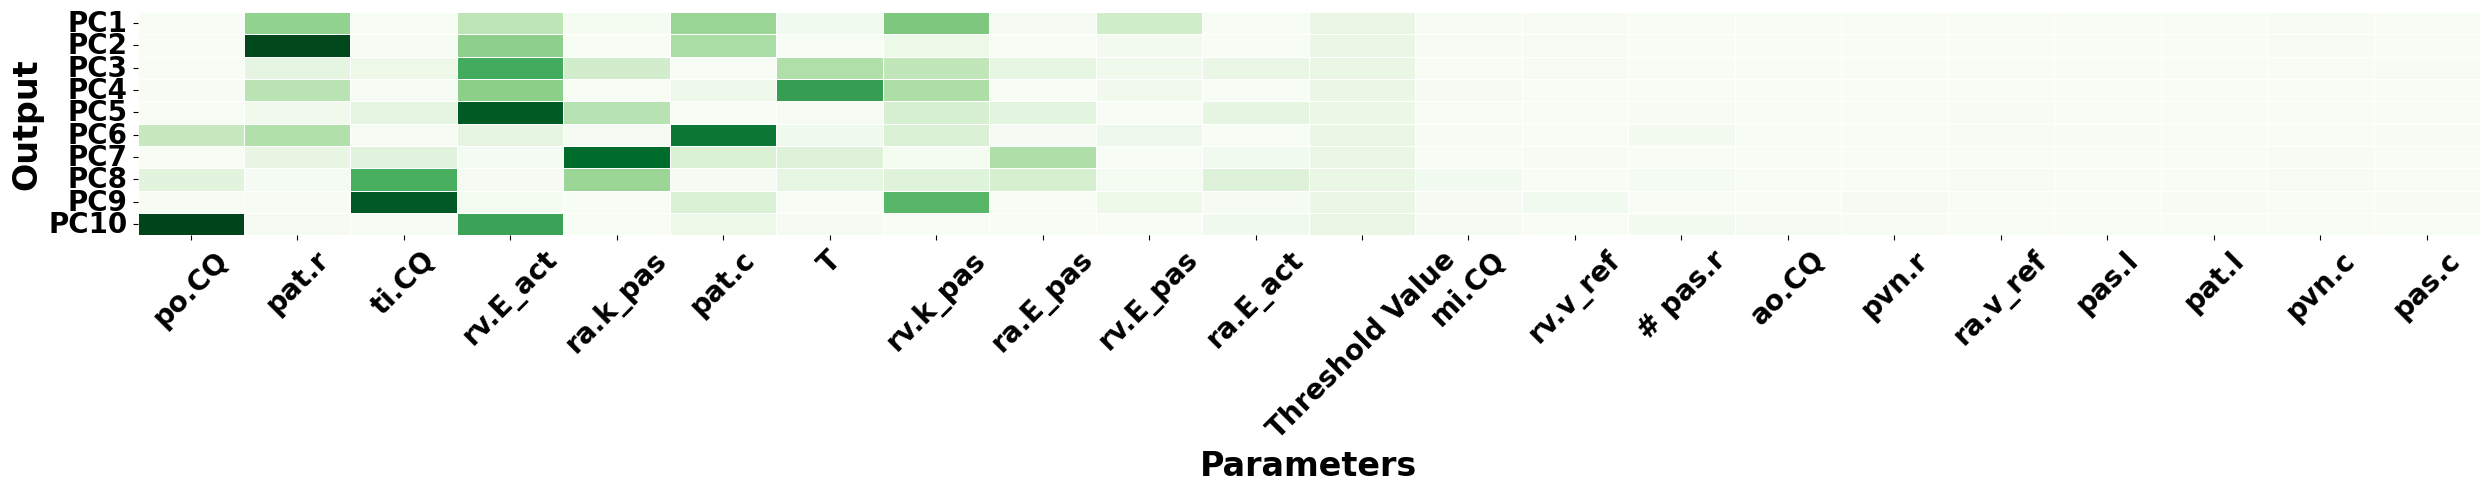

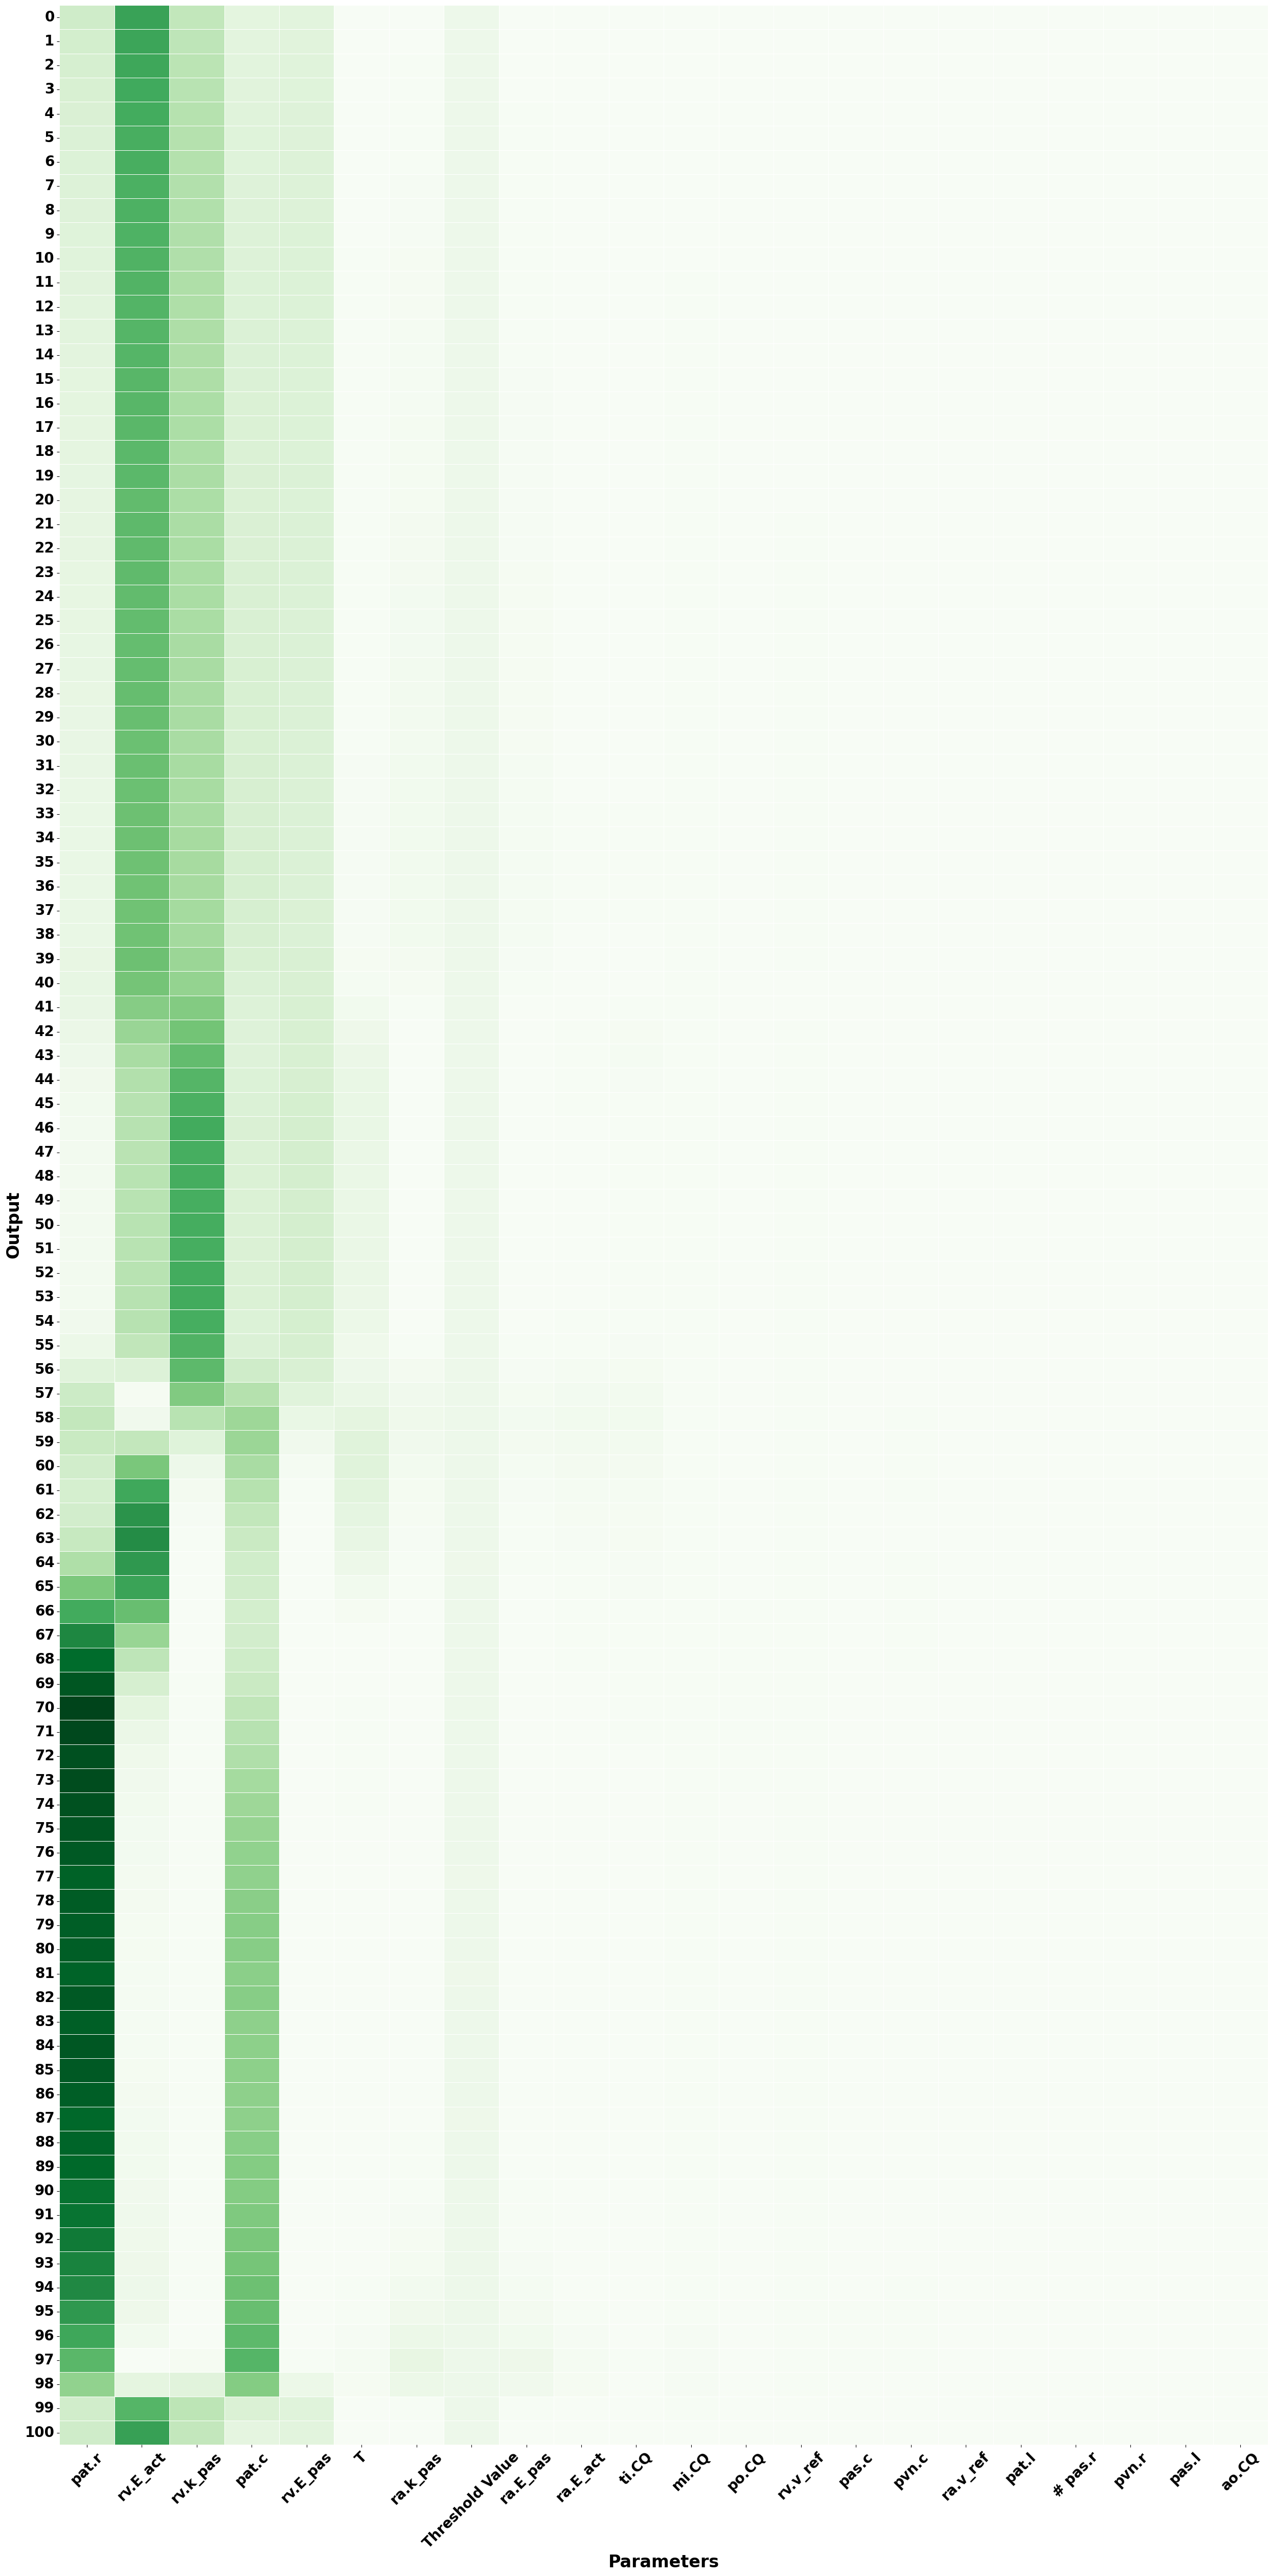

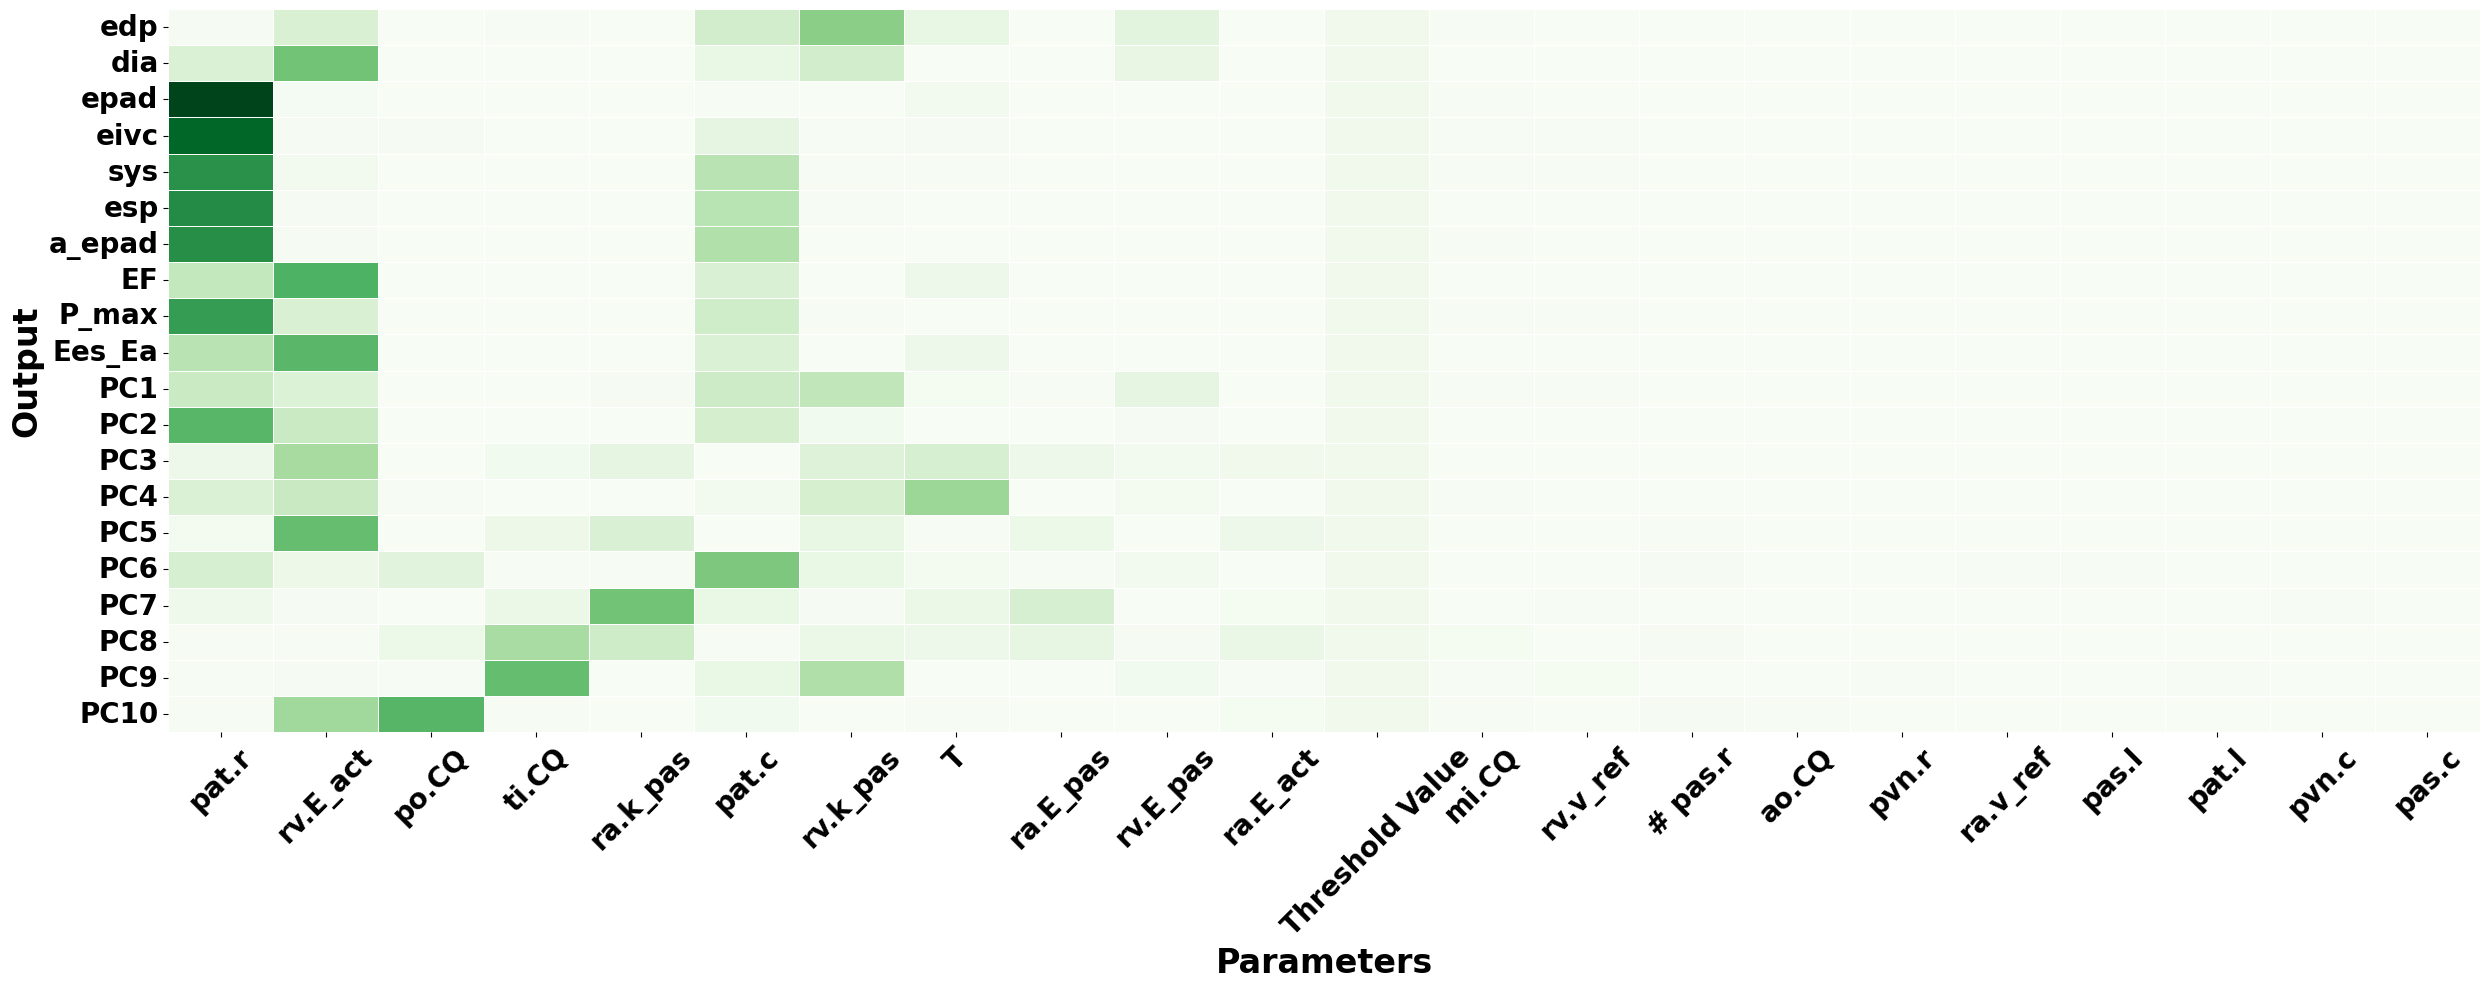

In [4]:

output_path = '../output_synthetic/output_2000_21_params/sensitivity_analysis_results'



summary_stats = ['edp', 'dia', 'epad', 'eivc', 'sys', 'esp', 'a_epad', 'EF', 'P_max', 'Ees_Ea']
selected_files = ['sensitivity_' + stat + '.csv' for stat in summary_stats]
plot_utils.plot_sensitivity_heatmap(directory = output_path, saveto = 'stats', selected_keys=selected_files)

pca = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]
selected_files = ['sensitivity_' + stat + '.csv' for stat in pca]
plot_utils.plot_sensitivity_heatmap(directory = output_path, saveto='pca', selected_keys=selected_files)

pca123 = ["PC1", "PC2", "PC3"]


waveform = [str(i) for i in range(101)]
selected_files = ['sensitivity_' + stat + '.csv' for stat in waveform]
plot_utils.plot_sensitivity_heatmap(directory = output_path,  saveto='waveform', selected_keys=selected_files)

sum_plus = summary_stats + pca
selected_files = ['sensitivity_' + stat + '.csv' for stat in sum_plus]
plot_utils.plot_sensitivity_heatmap(directory = output_path, saveto='pca', selected_keys=selected_files)


In [ ]:
import os

waveform = [str(i) for i in range(101)]
selected_files = ['sensitivity_' + stat + '.csv' for stat in waveform]
      
        
csv_files = [f for f in os.listdir(output_path) if f.endswith(".csv")]

all_parameters = set()
for file in selected_files:
    df = pd.read_csv(f"{output_path}/{file}")
    all_parameters.update(df['Parameter'].tolist())
all_parameters = sorted(list(all_parameters))

# Prepare a dataframe to collect ST values for each parameter across all files
st_df = pd.DataFrame(index=range(len(selected_files)), columns=all_parameters)

# Read each file and extract ST values for all parameters
for i, file in enumerate(selected_files):
    df = pd.read_csv(f"{output_path}/{file}")
    for _, row in df.iterrows():
        param = row['Parameter']
        st_df.loc[i, param] = row['ST']


label_params = ['pat.r', 'pat.c', 'T',  'rv.E_act', 'rv.k_pas', 'rv.E_pas']
label_offsets = {
    'pat.r': (1.7, -0.02),
    'pat.c': (1.7, 0),
    'T': (1.7, 0),
    'rv.E_act': (0.9, 0.03),
    'rv.k_pas': (0.9, 0.03),
    'rv.E_pas': (0.9, 0)
}
# Use a grey color for all lines except those in label_params, which use tab10 palette
highlight_palette = sns.color_palette("tab10", n_colors=len(label_params))
highlight_colors = dict(zip(label_params, highlight_palette))

plt.figure(figsize=(23, 9))
x = range(len(selected_files))
for param in all_parameters:
    y = pd.to_numeric(st_df[param], errors='coerce')
    if param in label_params:
        color = highlight_colors[param]
        linewidth = 3
        zorder = 3
    else:
        color = "grey"
        linewidth = 0.9
        zorder = 2
    line, = plt.plot(x, y, label=param if param in label_params else None, color=color, linewidth=linewidth, zorder=zorder)
    if param in label_params:
        x_offset, y_offset = label_offsets.get(param, (2, 0))
        plt.text(
            x[-1] + x_offset,
            y.iloc[-1] + y_offset,
            param,
            color=color,
            va='center',
            fontsize=16,
            fontweight='bold'
        )

plt.xlabel('Time', fontsize=24, fontweight='bold')
plt.xticks(rotation=0, fontsize=20, fontweight='bold')
plt.ylabel('ST Value', fontsize=24, fontweight='bold')
plt.yticks(rotation=0, fontsize=20, fontweight='bold')
plt.title('ST of All Parameters Over Time', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
st_sys = pd.read_csv("../output_synthetic/output_2000_21_params/sensitivity_analysis_results/sensitivity_sys.csv")
st_sys['ST'].mean()